<a href="https://colab.research.google.com/github/seongs/ML/blob/main/S3E3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1288]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/kaggle/playground-series-s3e3/train.csv')
test = pd.read_csv('/content/drive/MyDrive/kaggle/playground-series-s3e3/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/kaggle/playground-series-s3e3/sample_submission.csv')

train.shape, test.shape, submission.shape

((1677, 35), (1119, 34), (1119, 2))

In [1289]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [1290]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [1291]:
def summary_feature_info( df ):
    '''
        피처명, 형상, 타입, 결측치, 고유값수, 샘플값 구성된 df를 리턴한다
    '''
    #print(df.dtypes)
    # df.dtypes 인덱스명 그대로 인덱스, 타입이 컬럼으로 설정
    sub_df = pd.DataFrame( df.dtypes, columns=['type'])
    # 피처명도 하나의 데이터 -> 인덱스를 컬럼으로 이동
    sub_df = sub_df.reset_index()
    # 특정 컬럼명 변경(원본 반영 포함)
    sub_df.rename( columns={'index':'feature_name'}, inplace=True)
    # 결측치 수 -> 파생변수
    sub_df['결측치수'] = df.isnull().sum().values
    # 고유값수 -> 파생변수
    sub_df['고유값수'] = df.nunique().values
    # 샘플값_0 -> 파생변수
    sub_df['샘플값_0'] = df.loc[0].values
    # 샘플값_1 -> 파생변수
    sub_df['샘플값_1'] = df.loc[1].values
    # 샘플값_2 -> 파생변수
    sub_df['샘플값_2'] = df.loc[2].values
    return sub_df

summary_feat_df = summary_feature_info( train )
summary_feat_df

,feature_name,type,결측치수,고유값수,샘플값_0,샘플값_1,샘플값_2
0,id,int64,0,1677,0,1,2
1,Age,int64,0,43,36,35,32
2,BusinessTravel,object,0,3,Travel_Frequently,Travel_Rarely,Travel_Rarely
3,DailyRate,int64,0,625,599,921,718
4,Department,object,0,3,Research & Development,Sales,Sales
5,DistanceFromHome,int64,0,29,24,8,26
6,Education,int64,0,6,3,3,3
7,EducationField,object,0,6,Medical,Other,Marketing
8,EmployeeCount,int64,0,1,1,1,1
9,EnvironmentSatisfaction,int64,0,4,4,1,3


In [1292]:
train['Education'].unique()
# 이상치 있음 15

array([ 3,  4,  1,  2,  5, 15])

In [1293]:
train['Education'] = train['Education'].map({1:'Below College',2 : 'College',3 : 'Bachelor',4 : 'Master',5 : 'Doctor'})
train['Education'].unique()

array(['Bachelor', 'Master', 'Below College', 'College', 'Doctor', nan],
      dtype=object)

In [1294]:
test['Education'] = test['Education'].map({1:'Below College',2 : 'College',3 : 'Bachelor',4 : 'Master',5 : 'Doctor'})
test['Education'].unique()

array(['Below College', 'Master', 'Bachelor', 'College', 'Doctor'],
      dtype=object)

In [1295]:
train['EnvironmentSatisfaction'].unique()

array([4, 1, 3, 2])

In [1296]:
standard = {1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'}
train['EnvironmentSatisfaction'] = train['EnvironmentSatisfaction'].map(standard)
train['EnvironmentSatisfaction'].unique()

array(['Very High', 'Low', 'High', 'Medium'], dtype=object)

In [1297]:
standard = {1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'}
test['EnvironmentSatisfaction'] = test['EnvironmentSatisfaction'].map(standard)
test['EnvironmentSatisfaction'].unique()

array(['Very High', 'High', 'Medium', 'Low', nan], dtype=object)

In [1298]:
train['JobInvolvement'].unique()

array([3, 1, 2, 4])

In [1299]:
train['JobInvolvement']= train['JobInvolvement'].map({1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'})
train['JobInvolvement'].unique()

array(['High', 'Low', 'Medium', 'Very High'], dtype=object)

In [1300]:
test['JobInvolvement']= test['JobInvolvement'].map({1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'})
test['JobInvolvement'].unique()

array(['High', 'Medium', 'Very High', 'Low', nan], dtype=object)

In [1301]:
train['JobSatisfaction'].unique()

array([4, 1, 2, 3])

In [1302]:
train['JobSatisfaction']= train['JobSatisfaction'].map({1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'})
train['JobSatisfaction'].unique()

array(['Very High', 'Low', 'Medium', 'High'], dtype=object)

In [1303]:
test['JobSatisfaction']= test['JobSatisfaction'].map({1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'})
test['JobSatisfaction'].unique()

array(['High', 'Low', 'Very High', 'Medium'], dtype=object)

In [1304]:
train['PerformanceRating'].unique()

array([3, 4])

In [1305]:
test['PerformanceRating'].unique()

array([3, 4])

In [1306]:
train['PerformanceRating']= train['PerformanceRating'].map({1 : 'Low',2 : 'Good',3 : 'Excellent',4 : 'Outstanding'})
train['PerformanceRating'].unique()

array(['Excellent', 'Outstanding'], dtype=object)

In [1307]:
test['PerformanceRating']= test['PerformanceRating'].map({1 : 'Low',2 : 'Good',3 : 'Excellent',4 : 'Outstanding'})
test['PerformanceRating'].unique()

array(['Excellent', 'Outstanding'], dtype=object)

In [1308]:
train['RelationshipSatisfaction']= train['RelationshipSatisfaction'].map({1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'})
train['RelationshipSatisfaction'].unique()

array(['Medium', 'Very High', 'High', 'Low'], dtype=object)

In [1309]:
test['RelationshipSatisfaction']= test['RelationshipSatisfaction'].map({1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'})
test['RelationshipSatisfaction'].unique()

array(['Very High', 'High', 'Medium', 'Low'], dtype=object)

In [1310]:
train['WorkLifeBalance']= train['WorkLifeBalance'].map({1 : 'Bad',2 : 'Good',3 : 'Better',4 : 'Best'})
train['WorkLifeBalance'].unique()

array(['Better', 'Bad', 'Good', 'Best'], dtype=object)

In [1311]:
test['WorkLifeBalance']= test['WorkLifeBalance'].map({1 : 'Bad',2 : 'Good',3 : 'Better',4 : 'Best'})
test['WorkLifeBalance'].unique()

array(['Good', 'Better', 'Best', 'Bad'], dtype=object)

In [1312]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,Bachelor,Medical,1,Very High,...,80,1,10,2,Better,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,Bachelor,Other,1,Low,...,80,1,4,3,Better,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,Bachelor,Marketing,1,High,...,80,2,4,3,Better,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,Bachelor,Medical,1,High,...,80,0,15,1,Bad,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,Master,Medical,1,Medium,...,80,0,31,0,Better,31,14,4,10,1


In [1313]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1676 non-null   object
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   object
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   object
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [1314]:
train['Age'].unique()

array([36, 35, 32, 38, 50, 27, 34, 40, 51, 25, 29, 48, 26, 39, 33, 52, 42,
       30, 43, 24, 41, 47, 31, 56, 44, 28, 46, 18, 45, 37, 49, 53, 54, 23,
       59, 22, 55, 20, 57, 19, 21, 58, 60])

In [1315]:
train.isnull().sum().values
# 결측치 확인

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Axes: xlabel='Attrition', ylabel='count'>

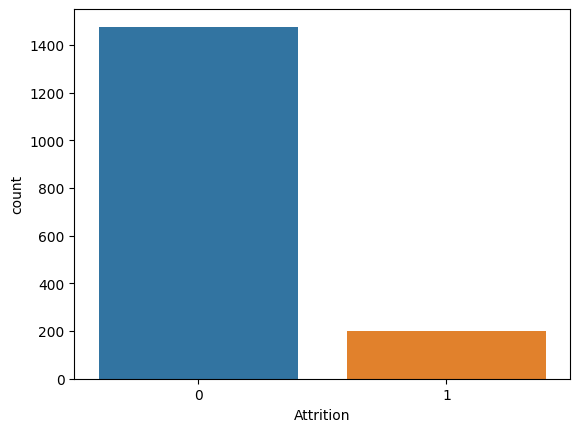

In [1316]:
import seaborn as sns
sns.countplot(data=train, x='Attrition')

[]

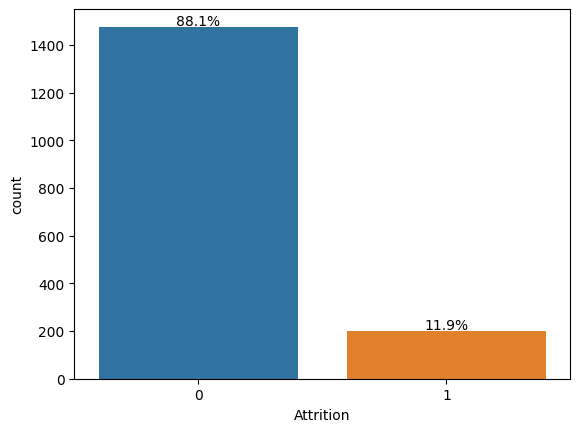

In [1317]:
def draw_test_by_ax(ax,data):

  percents = list()
  for bar in ax.patches:
    percent = bar.get_height()/data.shape[0] * 100
    ax.text(x = bar.get_x() + bar.get_width()/2, y = bar.get_y() + bar.get_height() + data.shape[0]*0.005,s= f'{percent:1.1f}%', ha = 'center')
  return ax, percents
_, rates = draw_test_by_ax(sns.countplot(data=train,x='Attrition'), train)
rates

In [1318]:
for column in train.columns:
    if train[column].dtype == 'category':
      train['column']=train['column'].astype('object')



In [1319]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1676 non-null   object
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   object
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   object
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [1320]:
cate_cols = []
for column in train.columns:
    if train[column].dtype == 'object':
        cate_cols.append(column)

cate_cols,len(cate_cols)


(['BusinessTravel',
  'Department',
  'Education',
  'EducationField',
  'EnvironmentSatisfaction',
  'Gender',
  'JobInvolvement',
  'JobRole',
  'JobSatisfaction',
  'MaritalStatus',
  'Over18',
  'OverTime',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'WorkLifeBalance'],
 15)

In [1321]:
from pandas.api.types import CategoricalDtype

Education = ['Below College' , 'College' , 'Bachelor' , 'Master' , 'Doctor']
EnvironmentSatisfaction = ['Low' , 'Medium' , 'High' , 'Very High']
JobInvolvement = ['Low' , 'Medium' , 'High' , 'Very High']
JobSatisfaction = ['Low' , 'Medium' , 'High' , 'Very High']
PerformanceRating =['Low' , 'Good' , 'Excellent' , 'Outstanding']
RelationshipSatisfaction = ['Low' , 'Medium' , 'High' , 'Very High']
WorkLifeBalance =['Bad' , 'Good' , 'Better' , 'Best']




# 순서타입 객체 생성
Education_type = CategoricalDtype(Education, True)
EnvironmentSatisfaction_type = CategoricalDtype(EnvironmentSatisfaction, True)
JobInvolvement_type = CategoricalDtype(JobInvolvement, True)
JobSatisfaction_type = CategoricalDtype(JobSatisfaction, True)
PerformanceRating_type = CategoricalDtype(PerformanceRating, True)
RelationshipSatisfaction_type = CategoricalDtype(RelationshipSatisfaction, True)
WorkLifeBalance_type = CategoricalDtype(WorkLifeBalance, True)

# 타입 변경 astype() : 형변환
train['Education'] = train['Education'].astype( Education_type )
train['EnvironmentSatisfaction'] = train['EnvironmentSatisfaction'].astype( EnvironmentSatisfaction_type )
train['JobInvolvement'] = train['JobInvolvement'].astype( JobInvolvement_type )
train['PerformanceRating'] = train['PerformanceRating'].astype( PerformanceRating_type )
train['RelationshipSatisfaction'] = train['RelationshipSatisfaction'].astype( RelationshipSatisfaction_type )
train['JobSatisfaction'] = train['JobSatisfaction'].astype( JobSatisfaction_type )
train['WorkLifeBalance'] = train['WorkLifeBalance'].astype( WorkLifeBalance_type )

In [1322]:
# 타입 변경 astype() : 형변환
test['Education'] = test['Education'].astype( Education_type )
test['EnvironmentSatisfaction'] = test['EnvironmentSatisfaction'].astype( EnvironmentSatisfaction_type )
test['JobInvolvement'] = test['JobInvolvement'].astype( JobInvolvement_type )
test['PerformanceRating'] = test['PerformanceRating'].astype( PerformanceRating_type )
test['RelationshipSatisfaction'] = test['RelationshipSatisfaction'].astype( RelationshipSatisfaction_type )
test['JobSatisfaction'] = test['JobSatisfaction'].astype( JobSatisfaction_type )
test['WorkLifeBalance'] = test['WorkLifeBalance'].astype( WorkLifeBalance_type )

In [1323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        1677 non-null   int64   
 1   Age                       1677 non-null   int64   
 2   BusinessTravel            1677 non-null   object  
 3   DailyRate                 1677 non-null   int64   
 4   Department                1677 non-null   object  
 5   DistanceFromHome          1677 non-null   int64   
 6   Education                 1676 non-null   category
 7   EducationField            1677 non-null   object  
 8   EmployeeCount             1677 non-null   int64   
 9   EnvironmentSatisfaction   1677 non-null   category
 10  Gender                    1677 non-null   object  
 11  HourlyRate                1677 non-null   int64   
 12  JobInvolvement            1677 non-null   category
 13  JobLevel                  1677 non-null   int64 

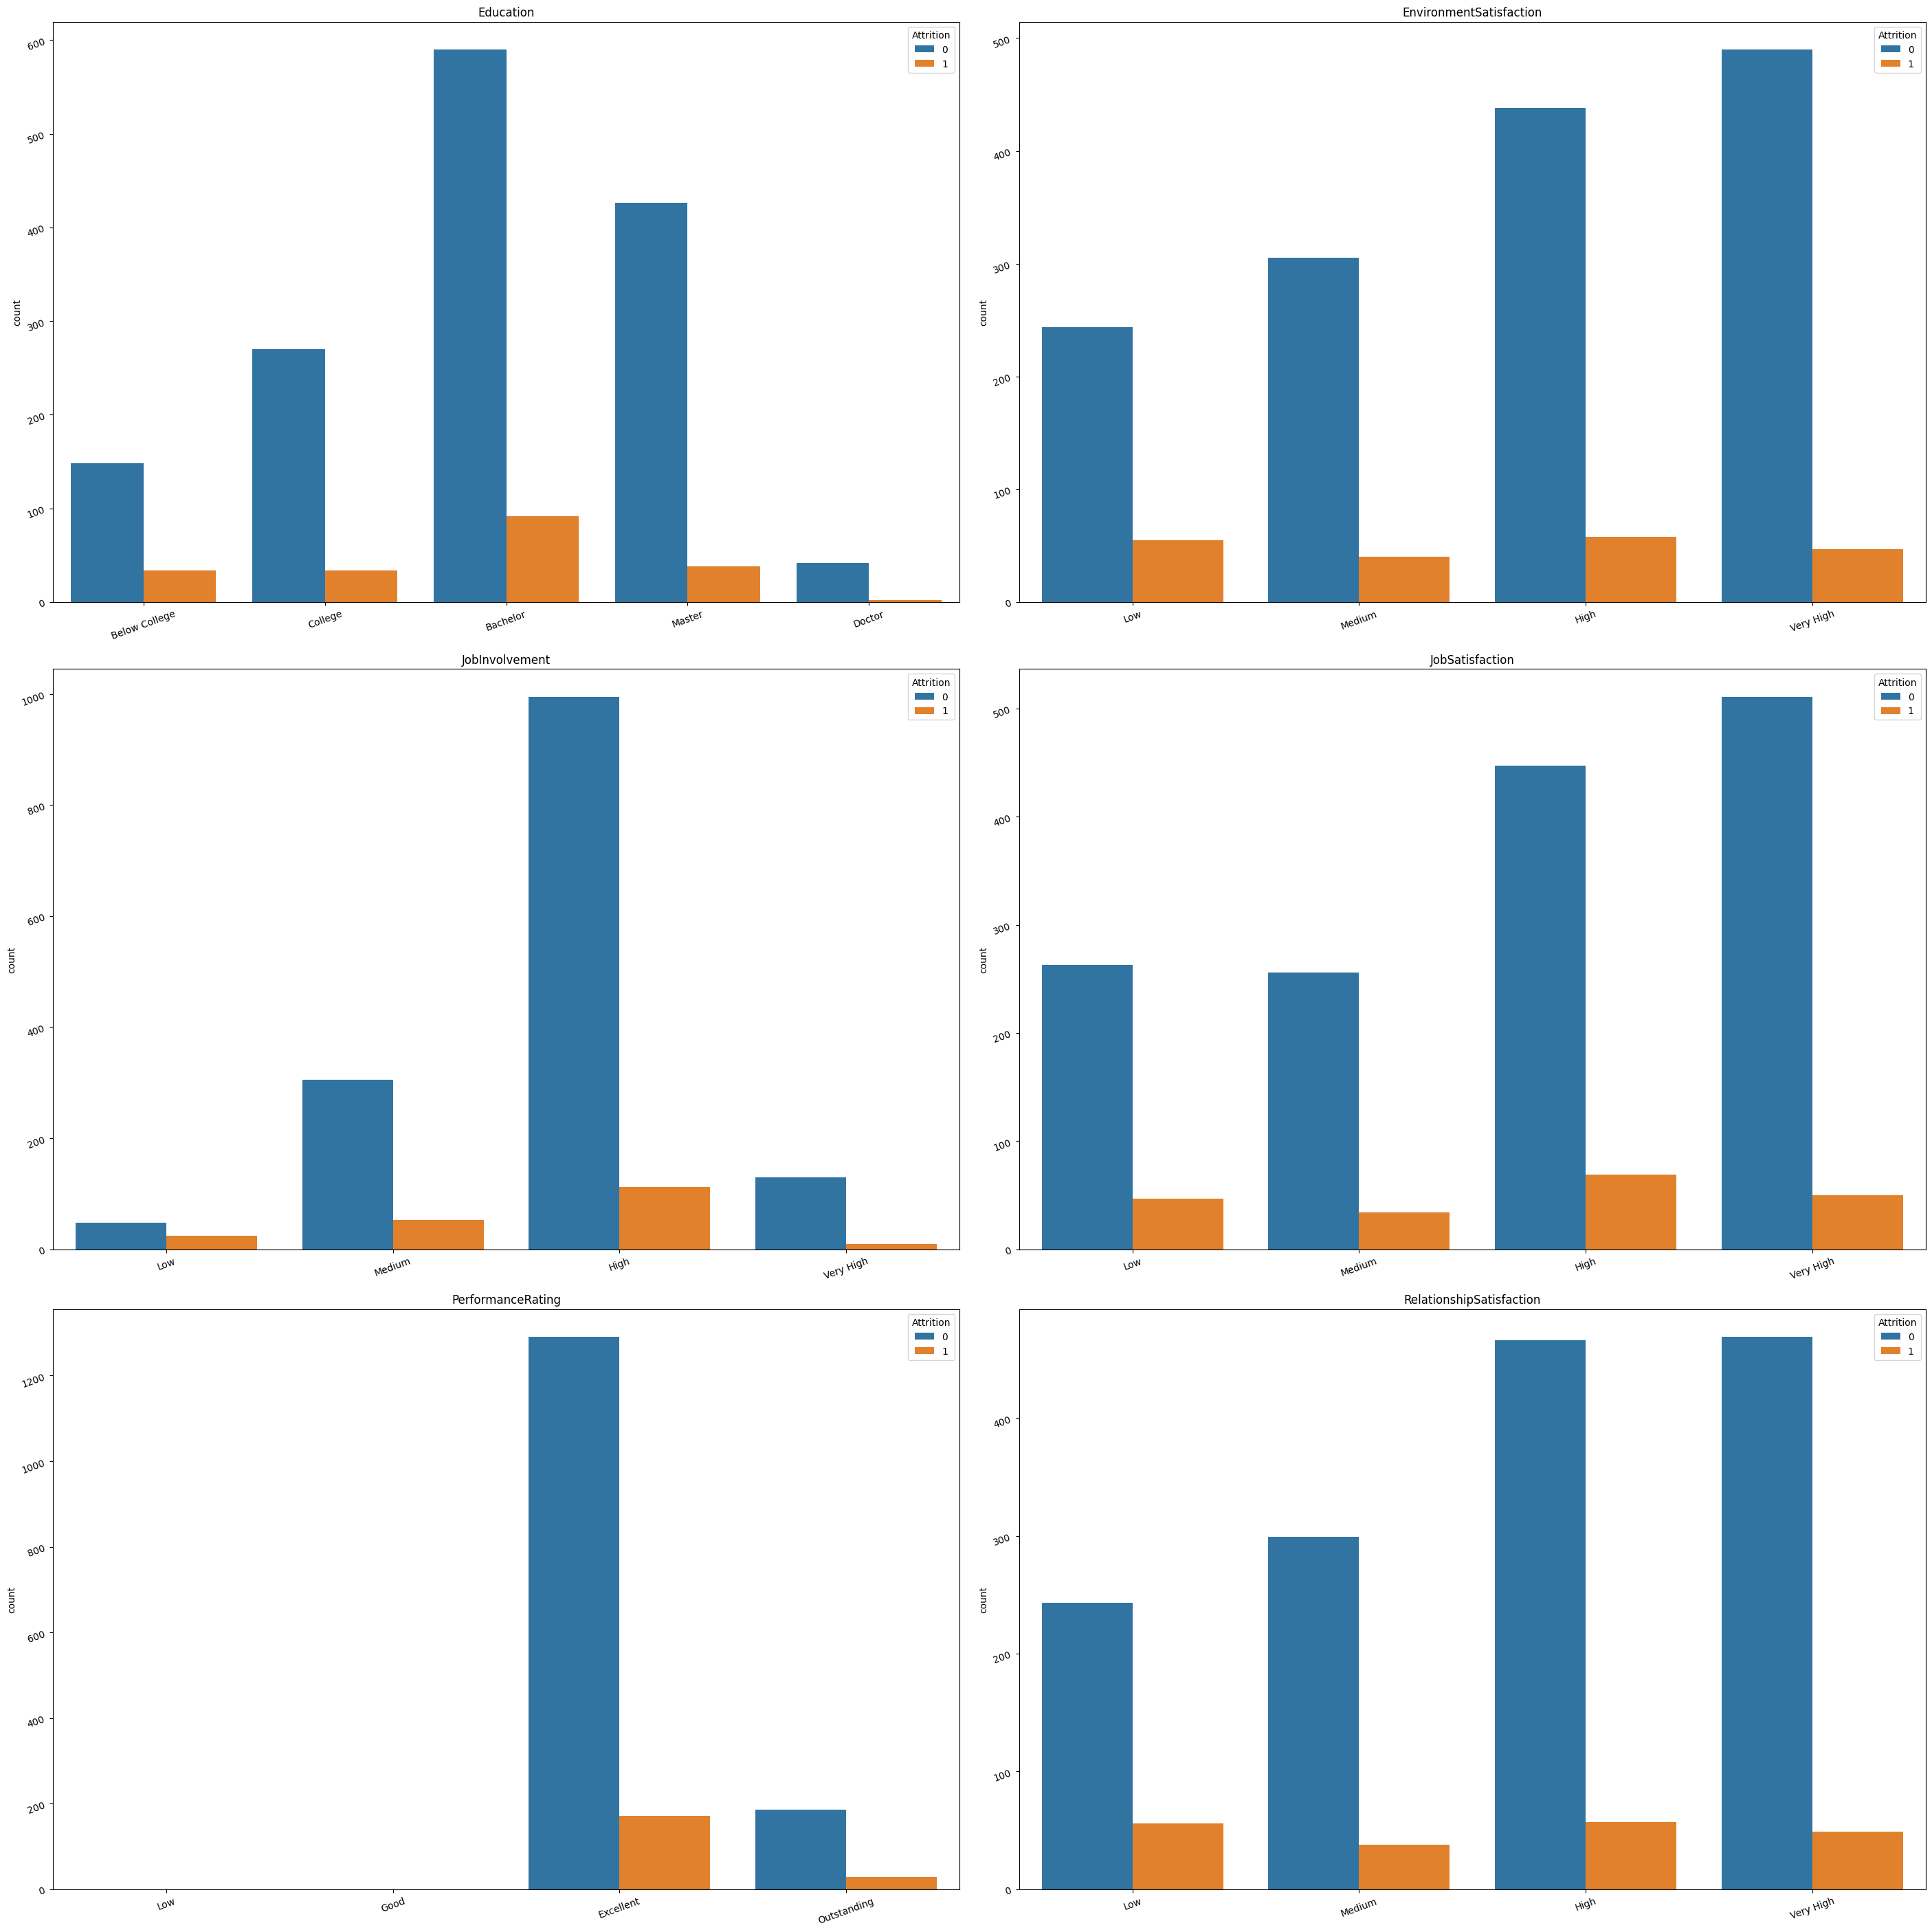

In [1324]:
category = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(28, 28), constrained_layout=True)
ax = ax.flatten()

for i in range(6):
    sns.countplot(x=category[i], data=train,
                      hue='Attrition', ax=ax[i]).set(xlabel = None)
    ax[i].set(title = category[i])

    if train[category[1]].nunique() >= 3:
        ax[i].tick_params(labelrotation=20)

plt.show()

In [1325]:
cont_cols = []
for column in train.columns:
    if train[column].dtype == 'int64' :
        cont_cols.append(column)

len(cont_cols)

20

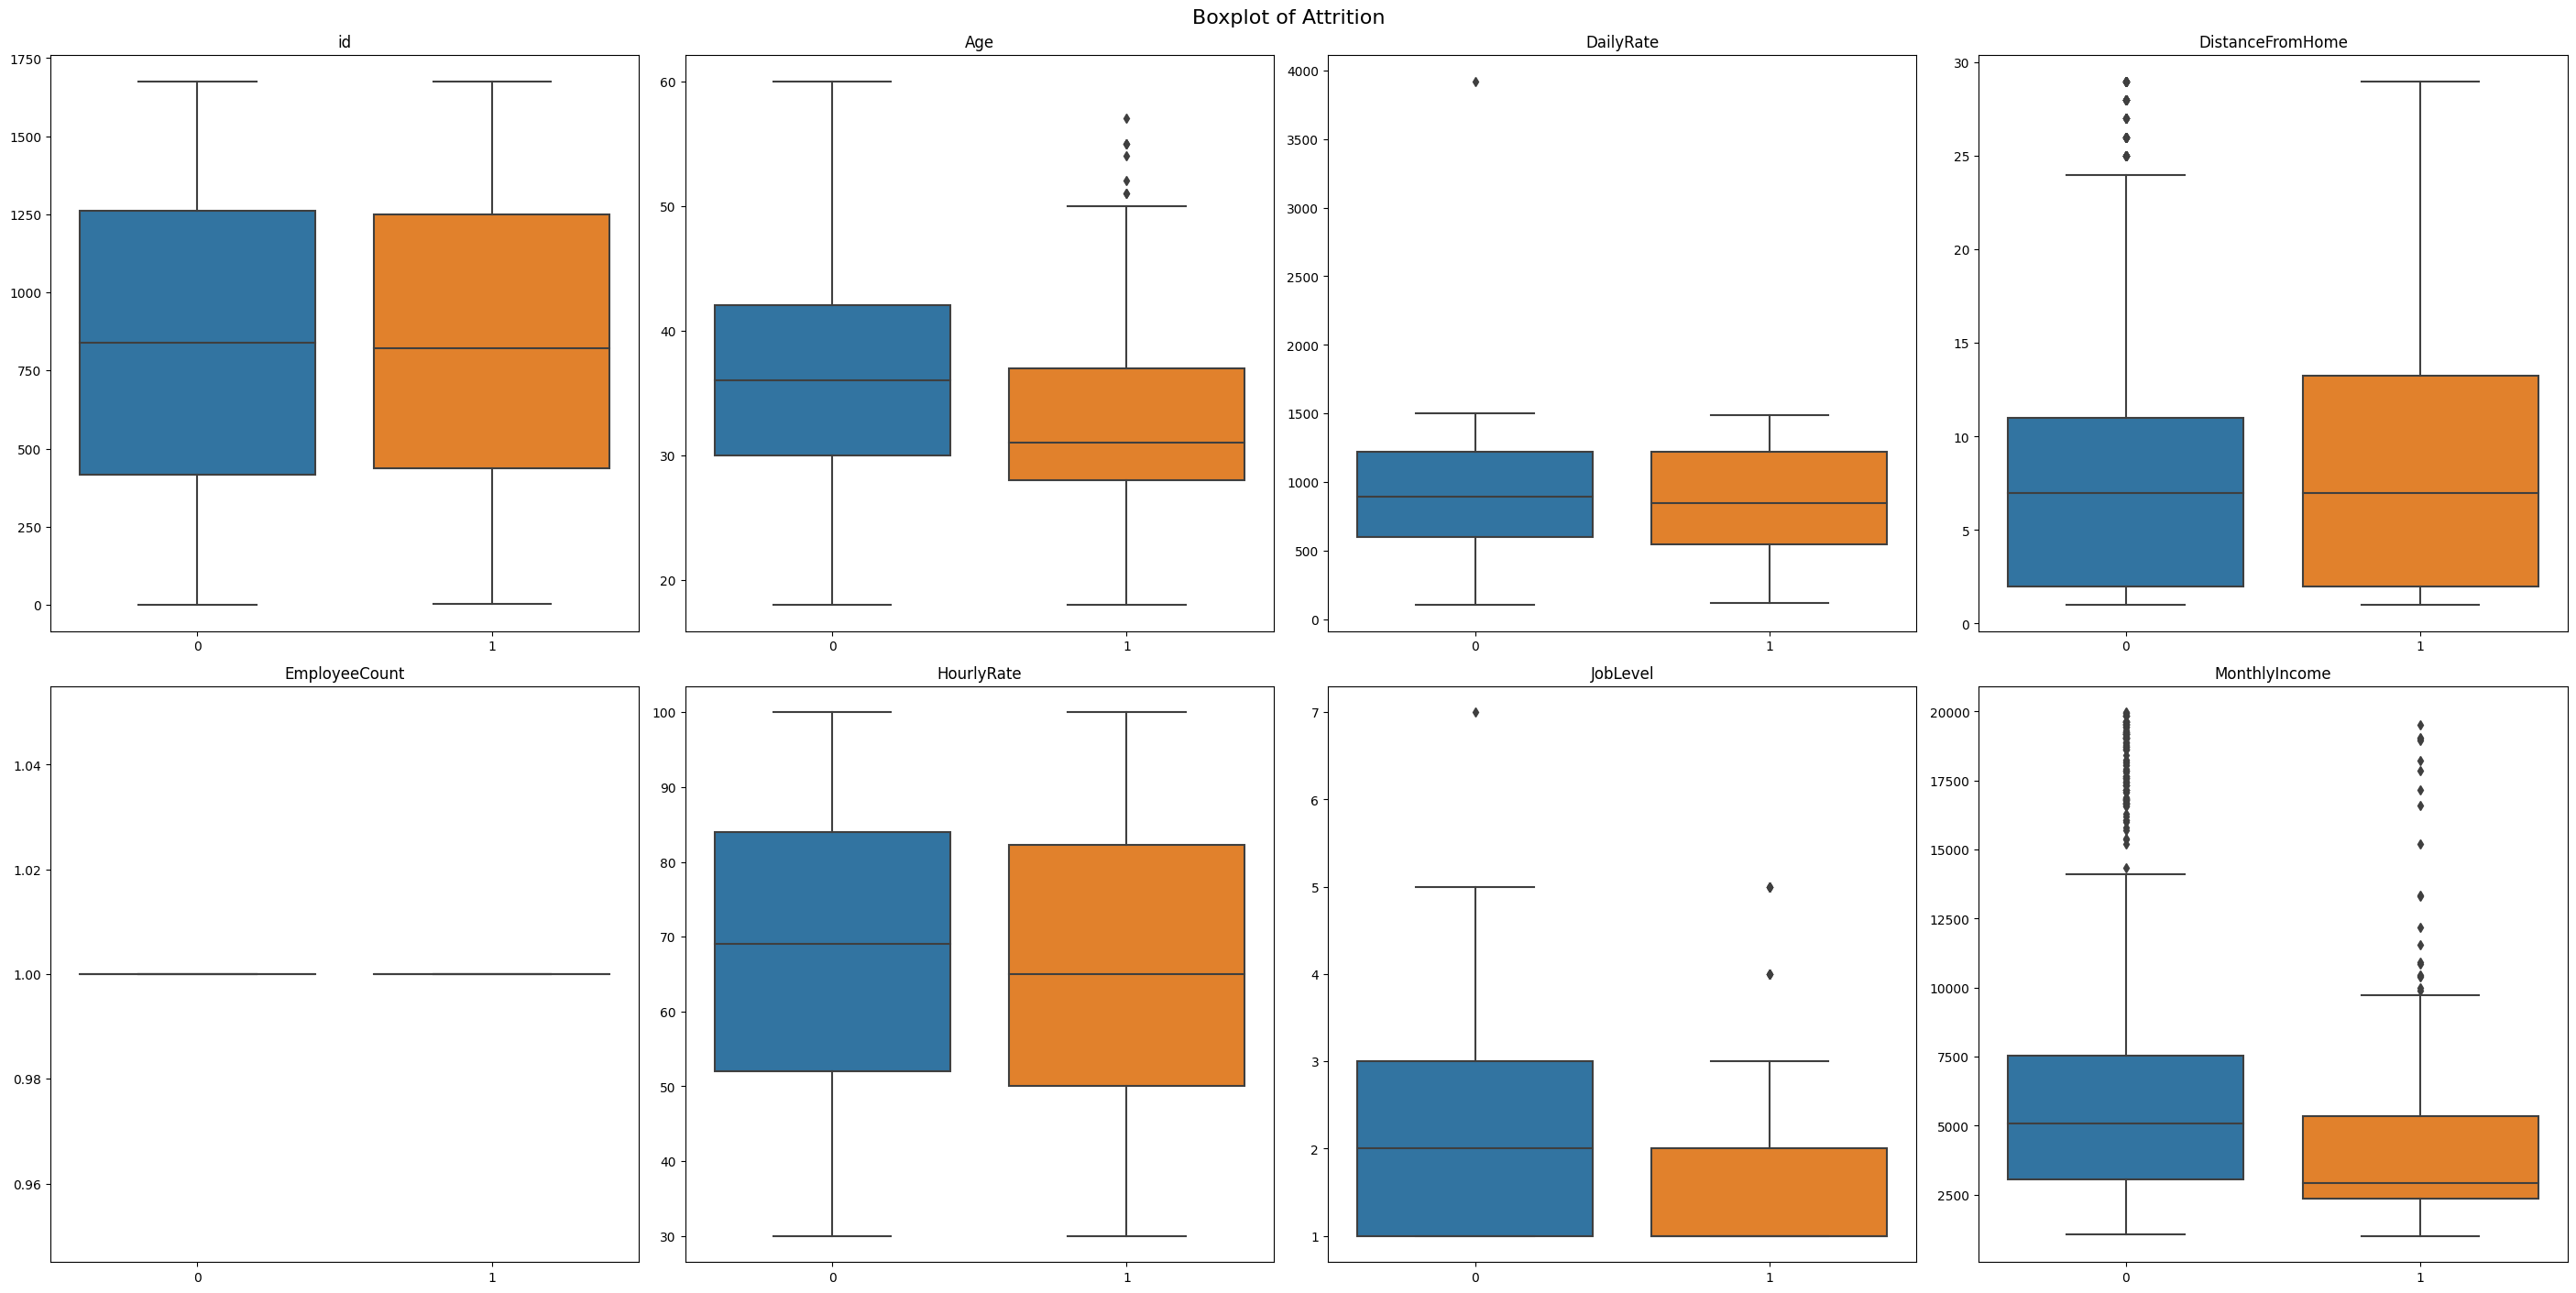

In [1326]:
# boxplot
fig, ax = plt.subplots(2, 4, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(8):
    ax[i].set(title = cont_cols[i])
    sns.boxplot(x=train['Attrition'], y = train[cont_cols[i]], ax=ax[i]).set(xlabel=None,  ylabel=None)

plt.show()

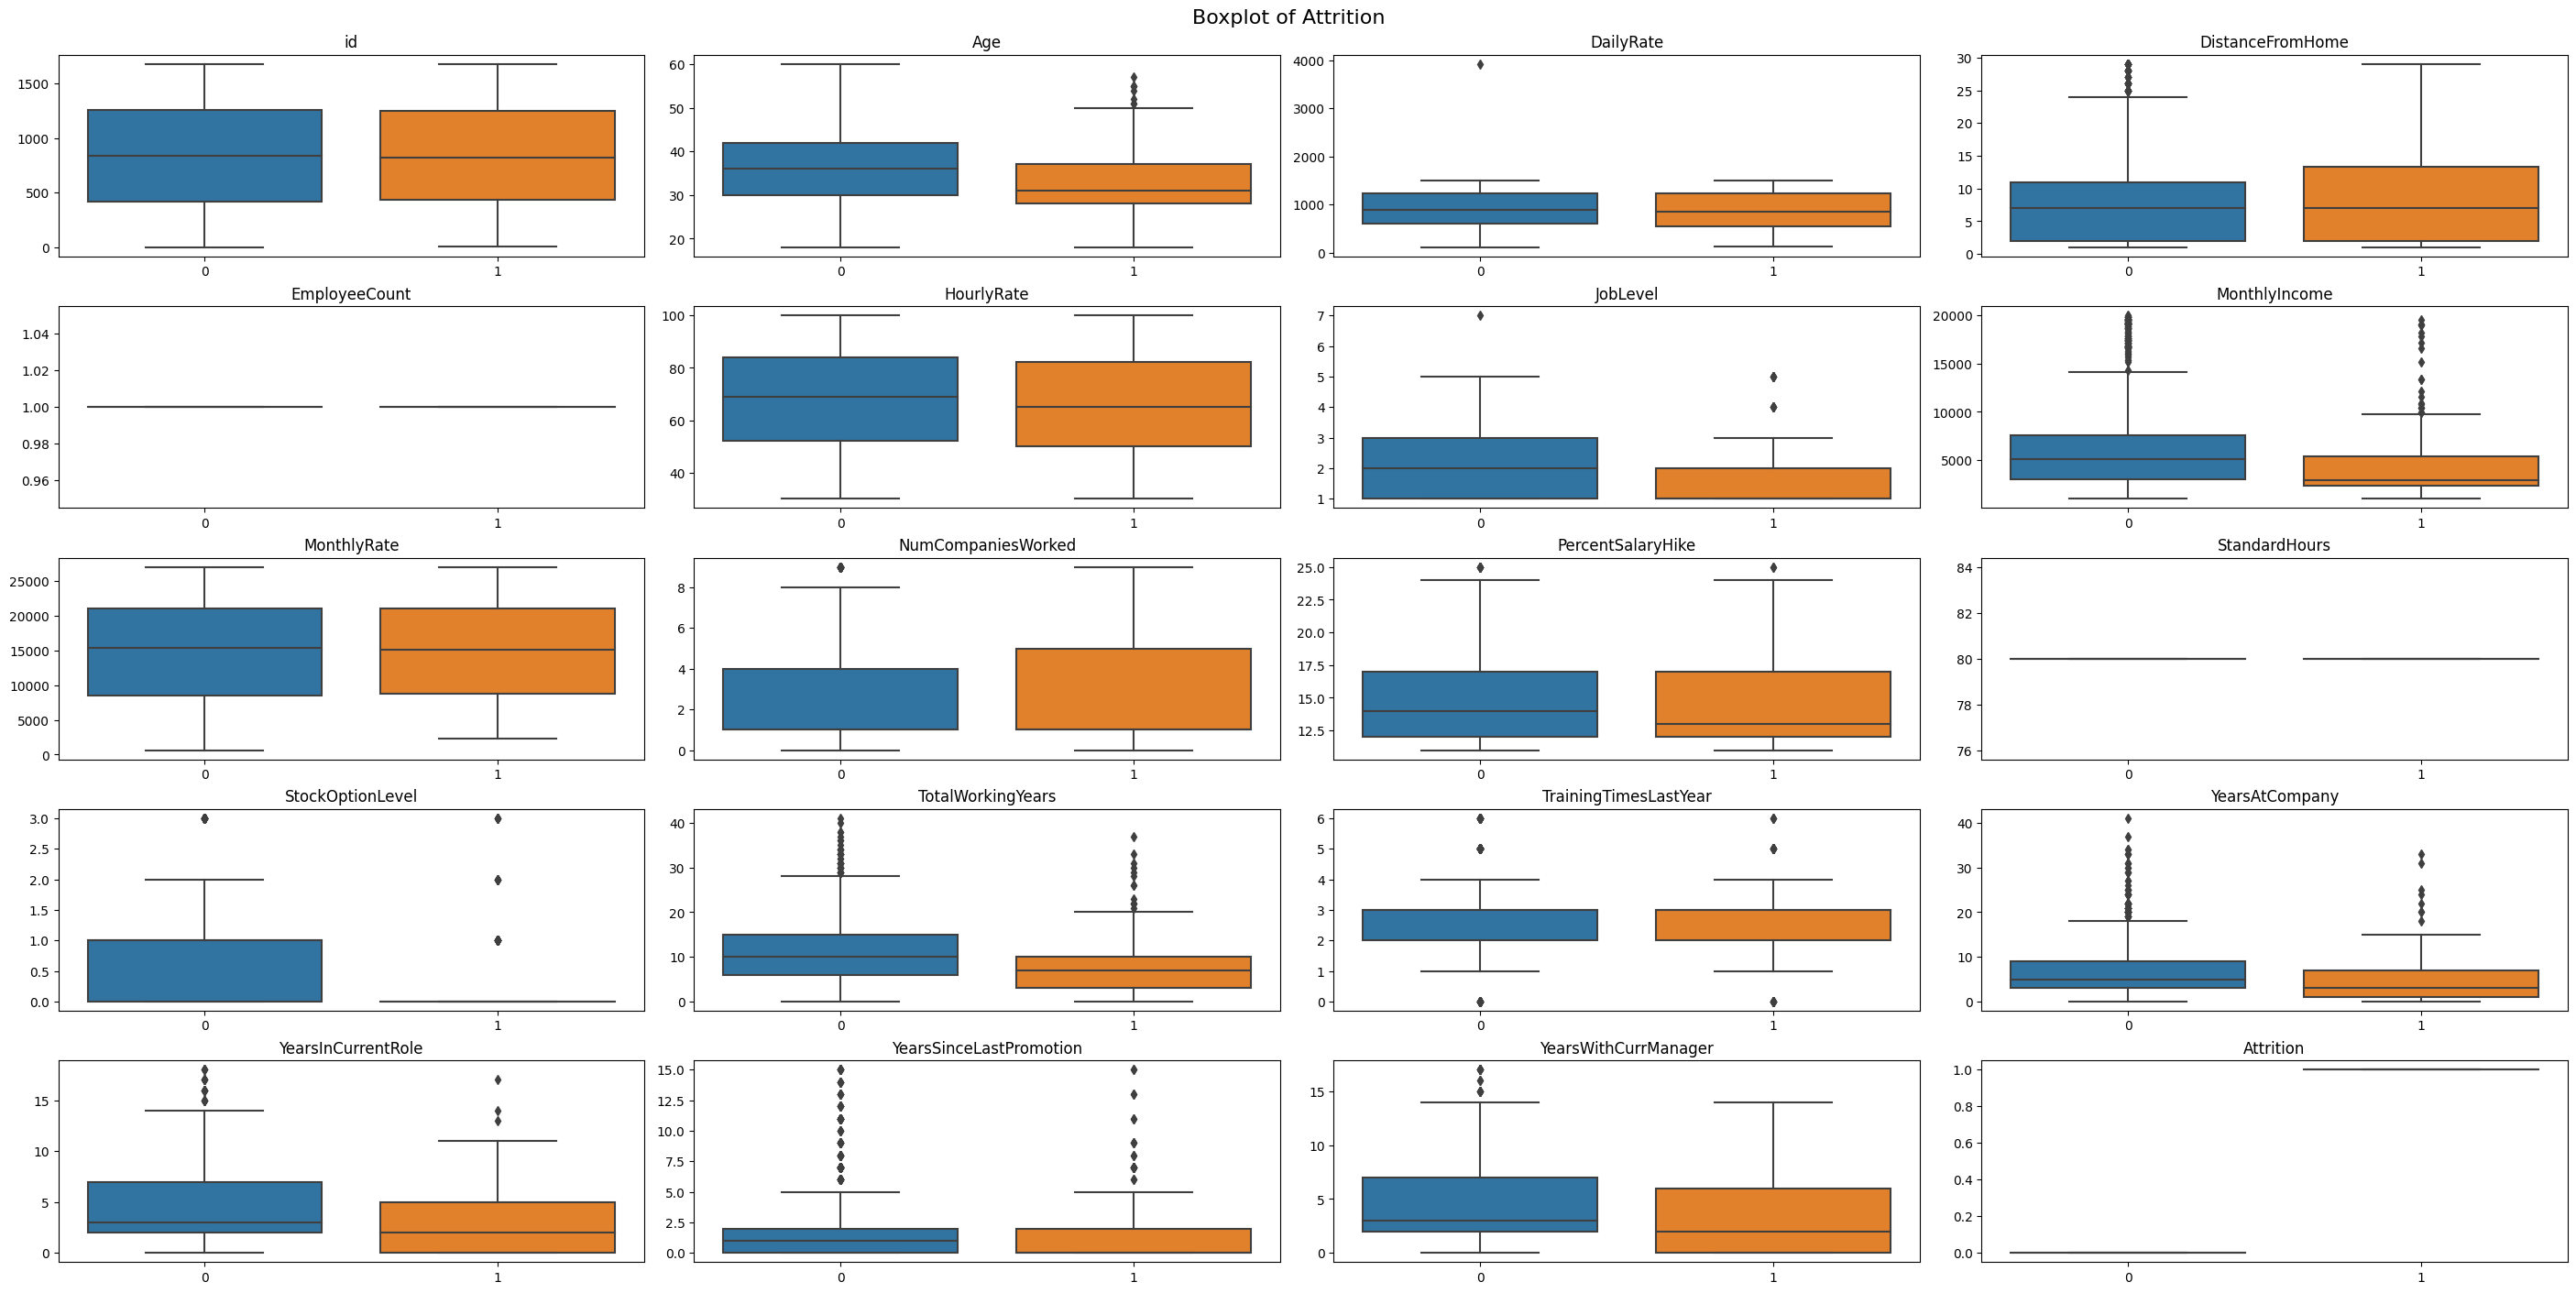

In [1327]:
# boxplot
fig, ax = plt.subplots(5, 4, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(len(cont_cols)):
    ax[i].set(title = cont_cols[i])
    sns.boxplot(x=train['Attrition'], y = train[cont_cols[i]], ax=ax[i]).set(xlabel=None,  ylabel=None)

plt.show()

In [1328]:
test.drop(['EmployeeCount', 'StandardHours', 'Over18','id'], axis = 1, inplace = True)
train.drop(['EmployeeCount', 'StandardHours', 'Over18','id'], axis = 1, inplace = True)

train.shape, test.shape, submission.shape

((1677, 31), (1119, 30), (1119, 2))

In [1329]:
test.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     1
Gender                      0
HourlyRate                  0
JobInvolvement              1
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [1330]:
train = train.dropna(axis = 0)
train.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

In [1331]:
test = test.dropna(axis = 0)
test.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [1332]:
train = train.copy()

In [1333]:
test = test.copy()

In [1334]:
train['Education']

0       Bachelor
1       Bachelor
2       Bachelor
3       Bachelor
4         Master
          ...   
1672    Bachelor
1673    Bachelor
1674    Bachelor
1675     College
1676    Bachelor
Name: Education, Length: 1676, dtype: category
Categories (5, object): ['Below College' < 'College' < 'Bachelor' < 'Master' < 'Doctor']

In [1335]:
Education_mapping = {'Below College' : 1 , 'College': 2 , 'Bachelor': 3 , 'Master': 4 , 'Doctor': 5}
EnvironmentSatisfaction_mapping = {'Low': 1 , 'Medium': 2 , 'High': 3 , 'Very High': 4}
JobInvolvement_mapping = {'Low': 1 , 'Medium': 2 , 'High': 3 , 'Very High': 4}
JobSatisfaction_mapping = {'Low': 1 , 'Medium': 2 , 'High': 3 , 'Very High': 4}
PerformanceRating_mapping ={'Low': 1 , 'Good': 2 , 'Excellent': 3 , 'Outstanding': 4}
RelationshipSatisfaction_mapping = {'Low': 1 , 'Medium': 2 , 'High': 3, 'Very High': 4}
WorkLifeBalance_mapping ={'Bad': 1 , 'Good': 2 , 'Better': 3 , 'Best': 4}


train['Education'] = train['Education'].map( Education_mapping )
train['EnvironmentSatisfaction'] = train['EnvironmentSatisfaction'].map( EnvironmentSatisfaction_mapping  )
train['JobInvolvement']  = train['JobInvolvement'].map( JobInvolvement_mapping )
train['PerformanceRating']  = train['PerformanceRating'].map( PerformanceRating_mapping )
train['RelationshipSatisfaction']  = train['RelationshipSatisfaction'].map( RelationshipSatisfaction_mapping )
train['JobSatisfaction']  = train['JobSatisfaction'].map( JobSatisfaction_mapping )
train['WorkLifeBalance']  = train['WorkLifeBalance'].map( WorkLifeBalance_mapping )


In [1336]:
test['Education'] = test['Education'].map( Education_mapping )
test['EnvironmentSatisfaction'] = test['EnvironmentSatisfaction'].map( EnvironmentSatisfaction_mapping  )
test['JobInvolvement']  = test['JobInvolvement'].map( JobInvolvement_mapping )
test['PerformanceRating']  = test['PerformanceRating'].map( PerformanceRating_mapping )
test['RelationshipSatisfaction']  = test['RelationshipSatisfaction'].map( RelationshipSatisfaction_mapping )
test['JobSatisfaction']  = test['JobSatisfaction'].map( JobSatisfaction_mapping )
test['WorkLifeBalance']  = test['WorkLifeBalance'].map( WorkLifeBalance_mapping )

In [1337]:
train['EnvironmentSatisfaction']

0       4
1       1
2       3
3       3
4       2
       ..
1672    4
1673    1
1674    2
1675    2
1676    3
Name: EnvironmentSatisfaction, Length: 1676, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [1338]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

ord_encoder = OrdinalEncoder()

OrdinalEncoder()

In [1341]:
ord_encoder.fit(train[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']])


train[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']] = ord_encoder.transform(train[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']])


test[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']] = ord_encoder.transform(test[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']])

In [1343]:
train['EnvironmentSatisfaction']

0       3.0
1       0.0
2       2.0
3       2.0
4       1.0
       ... 
1672    3.0
1673    0.0
1674    1.0
1675    1.0
1676    2.0
Name: EnvironmentSatisfaction, Length: 1676, dtype: float64

In [1344]:
cont_obj = []
for column in train.columns:
    if train[column].dtype == object:
        cont_obj.append(column)

In [1345]:
cont_obj

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [1346]:
ord_encoder.fit(train[cont_obj])
train[cont_obj] = ord_encoder.transform(train[cont_obj])
test[cont_obj] = ord_encoder.transform(test[cont_obj])